우선 타이타닉 승객 정보 csv파일을 다운받아 DataFrame으로 불러내 보겠습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/csv/titanic_test.csv'
titanic_df = pd.read_csv(file_path, sep=',')
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,NaN,"Devon, England Wichita, KS"
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,376563,8.0500,NaN,S,NaN,NaN
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN,NaN
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,C.A. 33112,36.7500,NaN,S,NaN,"Cornwall / Hancock, MI"


총 916명의 승객에 대한 정보가 나와있습니다.

1. pclass : 티켓 등급

2. survived : 생존 유무(생존=1, 죽음=0)

3. name : 승객 이름

4. sex : 성별

5. age : 나이

6. sibsp : 동승자 수(형제 또는 배우자)

7. parch : 동승자 수(부모 또는 자녀)

8. ticket : 티켓 번호

9. far : 티켓 요금

10. cabin : 선실 번호

11. embarked : 탑승 장소(선착장)

In [2]:
# 우선 데이터를 정제하기 위해, 결측 값을 측정하겠습니다.

titanic_df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          175
sibsp          0
parch          0
ticket         0
fare           0
cabin        702
embarked       2
body         831
home.dest    389
dtype: int64

In [3]:
# 결측 값인 'NaN'이 age, cabin, body, home.dest에서 많이 발생하네요. 
# age는 잠시 보류하고, cabin과 body, home.dest는 이번 분석에서  제외하겠습니다. 
# (생존과 연관이 별로 없다고 여겨지기 때문입니다.) 
titanic_df=titanic_df.drop(['cabin','body','home.dest'], axis=1)
titanic_df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,250644,19.5000,S
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,29103,23.0000,S
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,SC/PARIS 2148,13.8583,C
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,334914,7.7250,Q
...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,S
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,376563,8.0500,S
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,Q
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,C.A. 33112,36.7500,S


그럼 이제 age 중 결측 값을 채워야합니다. 
여기서 생각해볼 수 있는 방법은 크게 2가지가 있습니다.

1. 전체 나이의 평균
2. 성별, 이름(Mr, Miss, Mrs)으로 구분하여 평균


In [4]:
mean=titanic_df['age'].mean()
num=0
for i in titanic_df['age'] :
    if np.isnan(i) :
        titanic_df['age'][num]=mean
    num+=1
titanic_df['age']


0      13.000000
1       4.000000
2      30.000000
3      30.231444
4      22.000000
         ...    
911     0.170000
912    30.231444
913    30.231444
914    20.000000
915    32.000000
Name: age, Length: 916, dtype: float64

2개의 결측 값을 가진 'embarked'는 연속(continous)성의 값이 아닌, 구분값이기에 가장 큰 값으로 채우겠습니다.

In [5]:
titanic_df['embarked'].value_counts()

S    652
C    179
Q     83
Name: embarked, dtype: int64

S클래스가 제일 많으니, 2개의 결측값을 S로 채워도 전체에서 비율이 크게 변하지 않을 것입니다

In [6]:
num=0
for i in titanic_df['embarked'] :
    if type(i)==float :
        titanic_df['embarked'][num]='S'
    num+=1
titanic_df.isnull().sum()


pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

전체 데이터를 다시 확인해봅니다.

In [7]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.000000,0,1,250644,19.5000,S
1,2,1,"Wells, Miss. Joan",female,4.000000,1,1,29103,23.0000,S
2,2,1,"Duran y More, Miss. Florentina",female,30.000000,1,0,SC/PARIS 2148,13.8583,C
3,3,0,"Scanlan, Mr. James",male,30.231444,0,0,36209,7.7250,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.000000,0,0,334914,7.7250,Q


간단히 차트로 생존과 각 데이터의 연관관계를 추측해보겠습니다.

In [8]:
# 챠트용 캔버스 크기 설정
plt.rcParams["figure.figsize"] = (20,10)
# 축에 그리드 표시
plt.rcParams['axes.grid'] = True 

# 전체 구분 바챠트 그리기
def bar_chart(feature):
    survived = titanic_df[titanic_df['survived']==1][feature].value_counts()
    dead = titanic_df[titanic_df['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar',stacked=True)


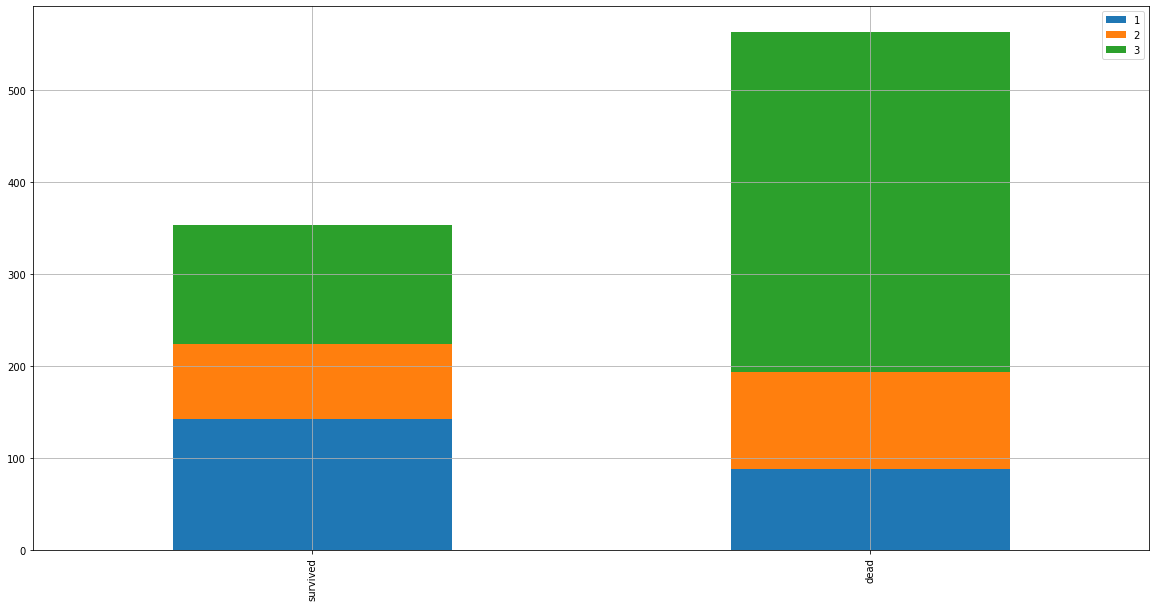

In [9]:
# 등급(pclass)와의 관계
bar_chart('pclass')

1등석이 다른 등급에 비해 살아남은 비중이 높습니다.
1등석의 위치가 생존에 유리한 곳에 위치함을 추측해볼 수 있습니다.


*성별(sex)와의 관계

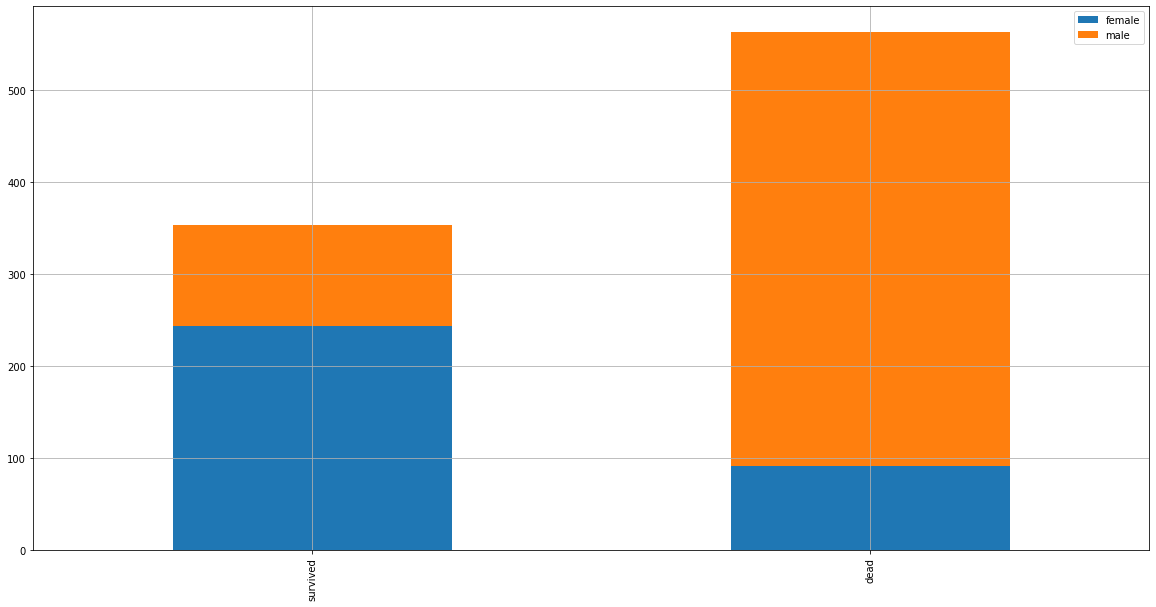

In [10]:
bar_chart('sex')

남성에 비해 여성이 많이 살아남았습니다.
구조 시, 여성을 우선적으로 구조했을 것이라고 추측할 수 있습니다.


*연령대(age)와의 관계

In [11]:
# 연령대는 구간별로 측정해야 하기에, 묶어서 그래프를 보겠습니다.
# 0 = 0~20살
# 1 = 21~40살
# 2 = 41~60살
# 3 = 60~80살
# 4 = 80살 이상

titanic_df.loc[titanic_df['age']<=20, 'age']=0
titanic_df.loc[(titanic_df['age']<=40)&(titanic_df['age']>20), 'age']=1
titanic_df.loc[(titanic_df['age']<=60)&(titanic_df['age']>40), 'age']=2
titanic_df.loc[(titanic_df['age']<=80)&(titanic_df['age']>60), 'age']=3
titanic_df.loc[titanic_df['age']>80, 'age']=4


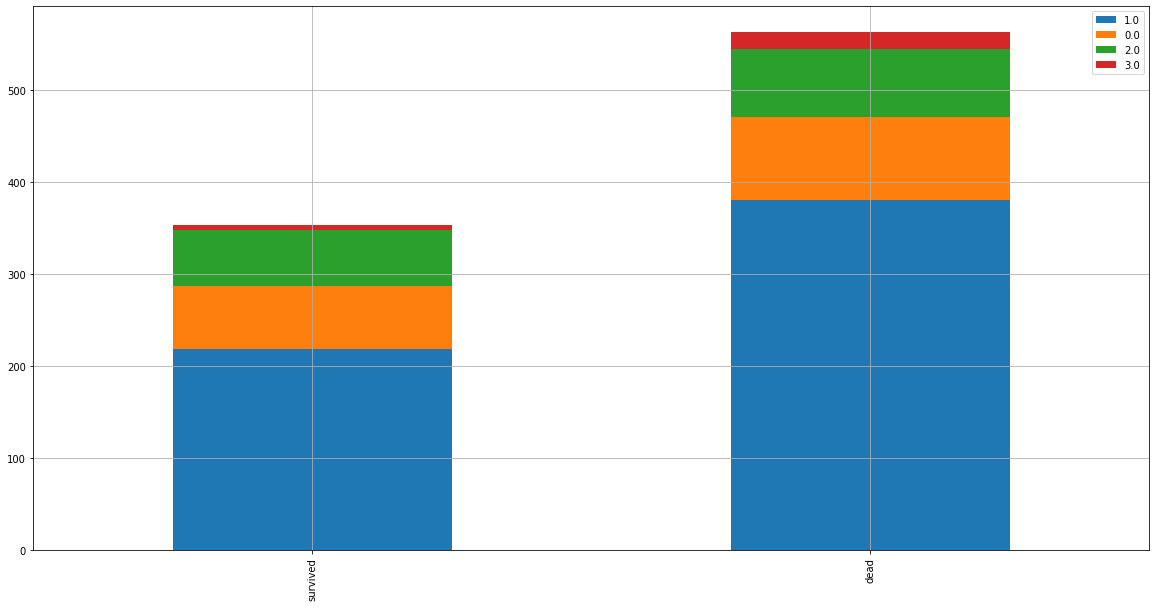

In [12]:
bar_chart('age')

연령대의 경우는 막대그래프로 봤을 때 확연한 차이가 나오지 않습니다. 
다만 0~20살의 경우, 생존율이 다른 연령대에 비해 높음을 확인할 수 있습니다.


그럼 각 데이터 간의 상관관계 표를 살펴보겠습니다.
상관관계 중 'pearson'의 상관관계 함수를 사용합니다.
(-1 : 음의 상관관계 / 0 : 상관없음 / 1 : 양의 상관관계)
 주의해야 할 점은 모든 데이터가 'continous'해야 한다는 점입니다.
즉 A가 증가, 혹은 감소함에 따라 B도 증가하거나 감소해야 합니다.
그래서 특정 구분 값의 경우, ('a','b','c')와 같은 데이터가 있다면 숫자로 변환하여 값을 비교해야 합니다.
(비록 비교하더라도 의미가 없을 수 있습니다)

 우선 데이터를 숫자로 변환합니다.
#문자 데이터의 숫자 변환
titanic_df.loc[titanic_df['embarked']=='S', 'embarked']=1
titanic_df.loc[titanic_df['embarked']=='C', 'embarked']=2
titanic_df.loc[titanic_df['embarked']=='Q', 'embarked']=3

#동승자 데이터 2열을 합함
titanic_df['family']=titanic_df['sibsp']+titanic_df['parch']
titanic_df=titanic_df.drop(['sibsp','parch'], axis=1)


In [13]:
# pandas의 corr()은 상관관계 측정 함수입니다.
titanic_df.corr(method='pearson')


,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.309735,-0.332608,0.073984,0.019397,-0.581359
survived,-0.309735,1.000000,-0.022401,-0.069888,0.061566,0.241467
age,-0.332608,-0.022401,1.000000,-0.162586,-0.106890,0.154959
sibsp,0.073984,-0.069888,-0.162586,1.000000,0.400843,0.179533
parch,0.019397,0.061566,-0.106890,0.400843,1.000000,0.252270
fare,-0.581359,0.241467,0.154959,0.179533,0.252270,1.000000


<AxesSubplot:>

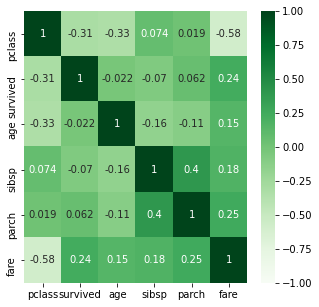

In [16]:
#heatmap으로 표시
#heatmap으로 상관관계를 표시
import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(titanic_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
